In [50]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt


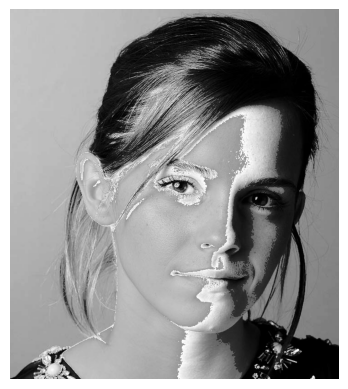

In [51]:
r = np.array([(50,100,150,255),(0,50,150,255)])
t1=np.linspace(0,r[0,0],r[1,1]).astype('uint8')
t2=np.linspace(r[0,1],r[0,3],r[1,2]-r[1,1]).astype('uint8')
t3=np.linspace(r[0,2],r[0,3],r[1,3]-r[1,2]+1).astype('uint8')
transform =np.concatenate((t1,t2,t3),axis=0).astype('uint8')

img = cv.imread('a1images/emma.jpg',cv.IMREAD_GRAYSCALE)
img_t=cv.LUT(img,transform)
img_tranformed = cv.cvtColor(img_t, cv.COLOR_BGR2RGB)

# Plot the image
plt.imshow(img_tranformed)
plt.axis('off')  # Hide axis ticks
plt.show()




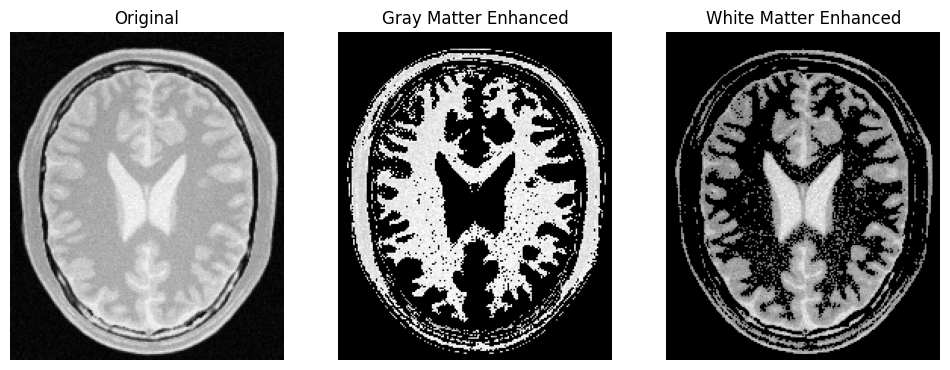

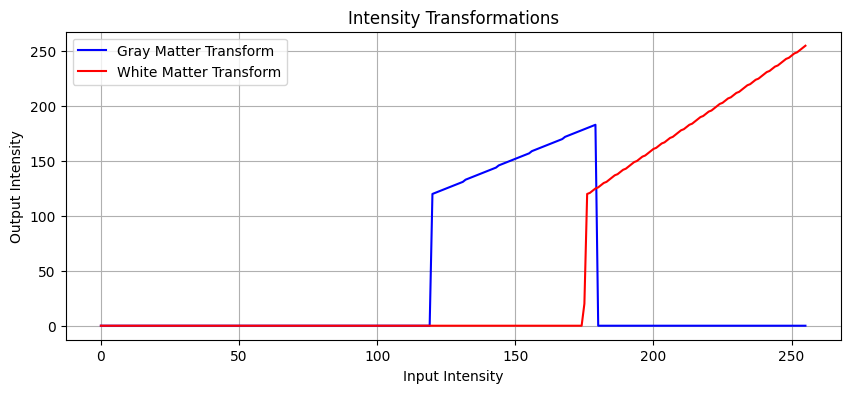

In [52]:
r_gray = np.array([
    (0,   120, 185, 0),   # Output intensities
    (0, 120, 180, 255)     # Input intensity ranges
])

# Intensity window to enhance white matter
r_white = np.array([
    (0,   20, 120, 255),   # output intensities
    (0,175, 176, 255) ])

# Function to generate transform LUT from r window
def get_transform(r):
    t1 = np.linspace(0, r[0, 0], r[1, 1], endpoint=False).astype('uint8')
    t2 = np.linspace(r[0, 1], r[0, 2], r[1, 2] - r[1, 1], endpoint=False).astype('uint8')
    t3 = np.linspace(r[0, 2], r[0, 3], r[1, 3] - r[1, 2] + 1).astype('uint8')
    transform = np.concatenate((t1, t2, t3), axis=0).astype('uint8')
    return transform
def get_transformg(r):
    t1 = np.linspace(0, r[0, 0], r[1, 1], endpoint=False).astype('uint8')
    t2 = np.linspace(r[0, 1], r[0, 2], r[1, 2] - r[1, 1], endpoint=False).astype('uint8')
    t3 = np.linspace(0, r[0, 3], r[1, 3] - r[1, 2] + 1).astype('uint8')
    transform = np.concatenate((t1, t2, t3), axis=0).astype('uint8')
    return transform
# Load image
img = cv.imread('a1images/brain_proton_density_slice.png', cv.IMREAD_GRAYSCALE)

# Create transforms
gray_transform = get_transformg(r_gray)
white_transform = get_transform(r_white)

# Apply LUTs
gray_enhanced = cv.LUT(img, gray_transform)
white_enhanced = cv.LUT(img, white_transform)

# Show result
plt.figure(figsize=(12,8))
plt.subplot(1, 3, 1)
plt.title("Original")
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.subplot(1, 3, 2)
plt.title("Gray Matter Enhanced")
plt.imshow(gray_enhanced, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title("White Matter Enhanced")
plt.imshow(white_enhanced, cmap='gray')
plt.axis('off')
# Plot intensity transformation curves
plt.figure(figsize=(10, 4))
plt.plot(gray_transform, label='Gray Matter Transform', color='blue')
plt.plot(white_transform, label='White Matter Transform', color='red')
plt.xlabel("Input Intensity")
plt.ylabel("Output Intensity")
plt.title("Intensity Transformations")
plt.legend()
plt.grid(True)
plt.show()

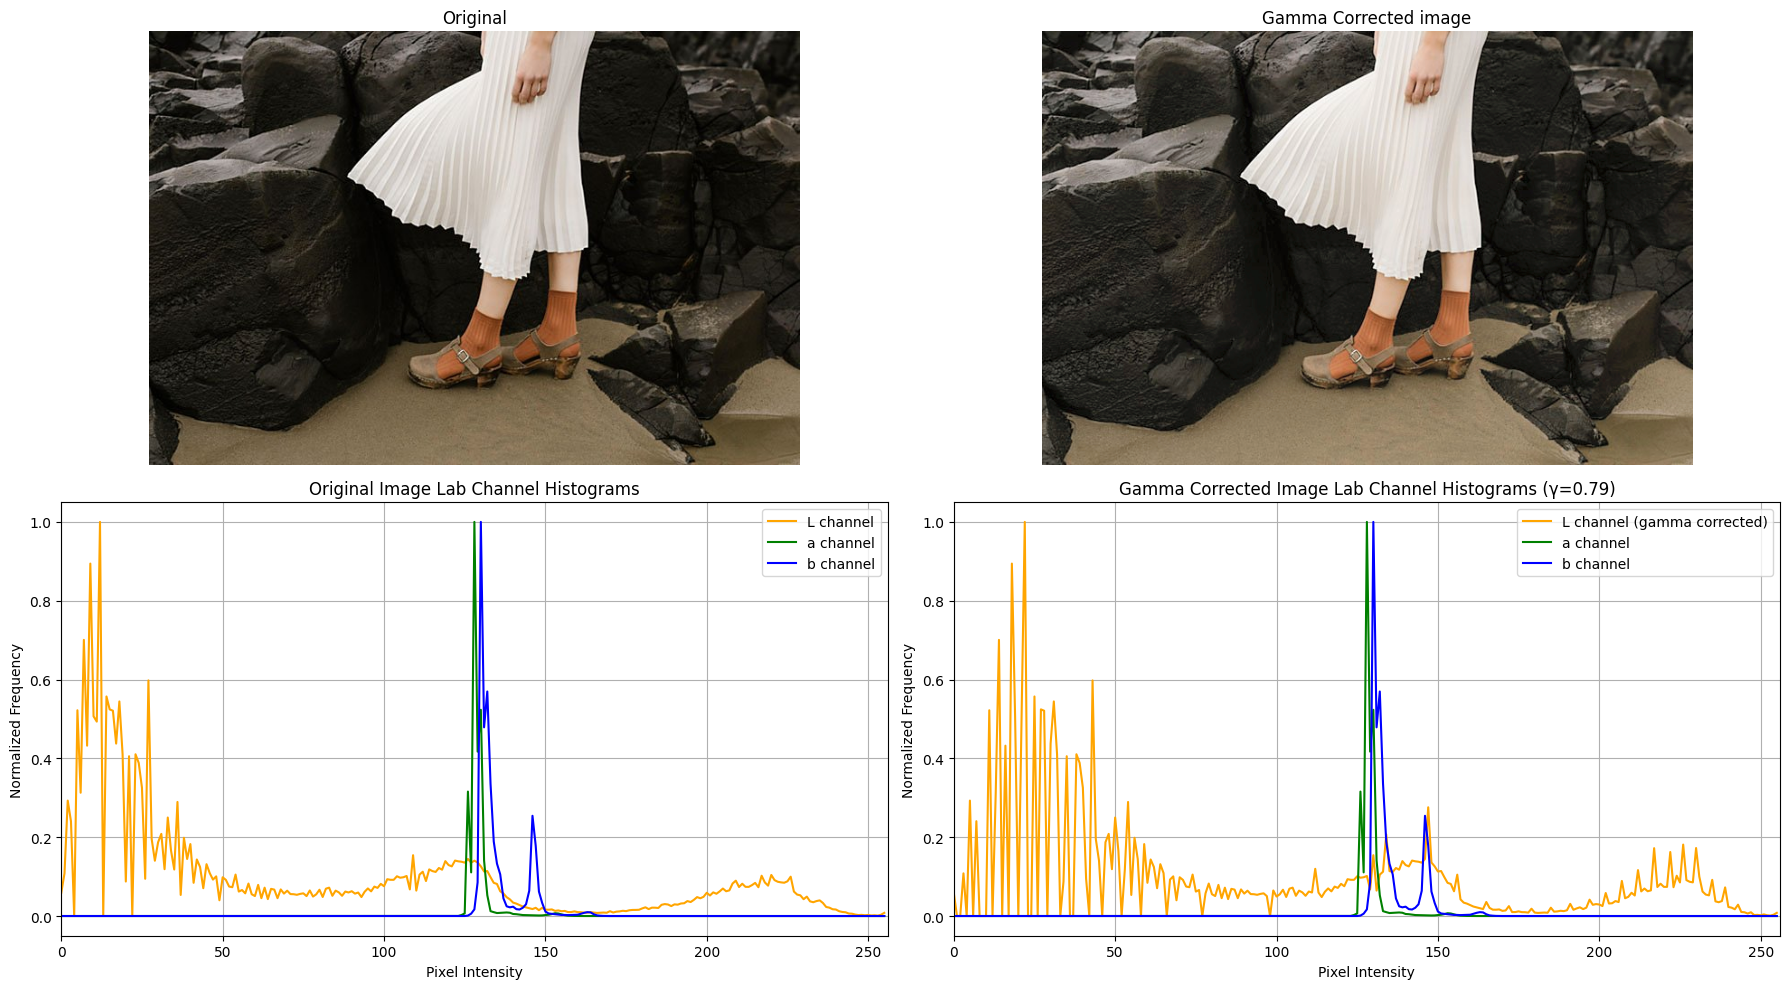

In [53]:
IMG= cv.imread("a1images/highlights_and_shadows.jpg",cv.COLOR_RGB2BGR)
org_img=cv.cvtColor(IMG,cv.COLOR_RGB2BGR)
img_lab = cv.cvtColor(IMG, cv.COLOR_BGR2Lab)
l_channel, a_channel, b_channel = cv.split(img_lab)

# Gamma correction on L channel only
gamma = 0.79
t = np.array([(i / 255.0) ** gamma * 255 for i in np.arange(256)]).astype('uint8')
gamma_corrected_l = cv.LUT(l_channel, t)

# Merge gamma corrected L with original a and b channels
img_gamma_lab = cv.merge((gamma_corrected_l, a_channel, b_channel))
img_tranformed = cv.cvtColor(img_gamma_lab, cv.COLOR_Lab2BGR)
img_rgb = cv.cvtColor(img_tranformed, cv.COLOR_RGB2BGR)
# Function to calculate normalized histogram for a channel
def calc_norm_hist(channel):
    hist = cv.calcHist([channel], [0], None, [256], [0,256])
    hist_norm = hist / hist.max()
    return hist_norm

# Calculate histograms for original channels
hist_l_orig = calc_norm_hist(l_channel)
hist_a_orig = calc_norm_hist(a_channel)
hist_b_orig = calc_norm_hist(b_channel)

# Calculate histograms for gamma corrected channels
hist_l_gamma = calc_norm_hist(gamma_corrected_l)
hist_a_gamma = calc_norm_hist(a_channel)  # unchanged
hist_b_gamma = calc_norm_hist(b_channel)  # unchanged

# Plotting
plt.figure(figsize=(18,10))
plt.subplot(2, 2, 1)
plt.title("Original")


plt.imshow(org_img)
plt.axis('off')
plt.subplot(2, 2, 2)
plt.title("Gamma Corrected image")
plt.axis('off')
plt.imshow(img_rgb)
plt.axis('off')  # Hide axis ticks
# Original image histograms
plt.subplot(2, 2, 3)
plt.plot(hist_l_orig, color='orange', label='L channel')
plt.plot(hist_a_orig, color='green', label='a channel')
plt.plot(hist_b_orig, color='blue', label='b channel')
plt.title('Original Image Lab Channel Histograms')
plt.xlabel('Pixel Intensity')
plt.ylabel('Normalized Frequency')
plt.legend()
plt.xlim([0, 256])
plt.grid(True)

# Gamma corrected image histograms
plt.subplot(2, 2, 4)
plt.plot(hist_l_gamma, color='orange', label='L channel (gamma corrected)')
plt.plot(hist_a_gamma, color='green', label='a channel')
plt.plot(hist_b_gamma, color='blue', label='b channel')
plt.title(f'Gamma Corrected Image Lab Channel Histograms (γ={gamma})')
plt.xlabel('Pixel Intensity')
plt.ylabel('Normalized Frequency')
plt.legend()
plt.xlim([0, 256])
plt.grid(True)

plt.tight_layout()
plt.show()

In [54]:
img=cv.imread("a1images/spider.png",cv.COLOR_BGR2HSV)
h_channel,s_channel,v_channel=cv.split(img)










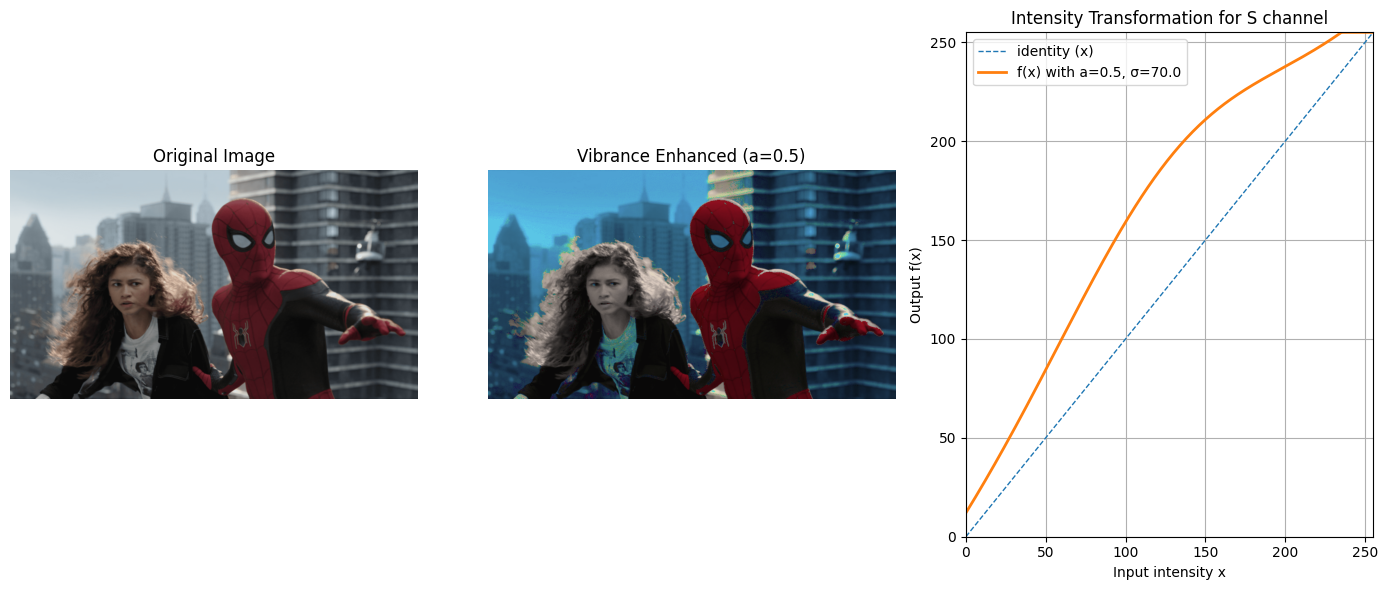

<Figure size 1000x400 with 0 Axes>

In [49]:
# ===== Parameters =====
img_path = "a1images/spider.png"   # <-- replace with your image path
sigma = 70.0
a = 0.5                      # <-- chosen value of a (report this)
img_bgr = cv.imread(img_path)
img_rgb = cv.cvtColor(img_bgr, cv.COLOR_BGR2RGB)
img_hsv = cv.cvtColor(img_bgr, cv.COLOR_BGR2HSV)
h, s, v = cv.split(img_hsv)

xs = np.arange(256).astype(np.float32)
f_x = xs + a * 128.0 * np.exp(-((xs - 128.0) ** 2) / (2.0 * (sigma ** 2)))
f_x = np.minimum(f_x, 255.0)
lut = np.round(f_x).astype(np.uint8)  # lookup table
s_trans = cv.LUT(h, lut)
img_hsv_trans = cv.merge((h, s_trans, v))

# Convert transformed HSV back to RGB for display
img_bgr_trans = cv.cvtColor(img_hsv_trans, cv.COLOR_HSV2BGR)
img_rgb_trans = cv.cvtColor(img_bgr_trans, cv.COLOR_BGR2RGB)

# Plot original image, enhanced image, and the transform curve
plt.figure(figsize=(14,6))

# Original image
plt.subplot(1,3,1)
plt.imshow(img_rgb)
plt.title("Original Image")
plt.axis("off")

# Enhanced image
plt.subplot(1,3,2)
plt.imshow(img_rgb_trans)
plt.title(f"Vibrance Enhanced (a={a})")
plt.axis("off")

# Plot intensity transformation (curve)
plt.subplot(1,3,3)
plt.plot(xs, xs, linestyle='--', label='identity (x)', linewidth=1)
plt.plot(xs, f_x, label=f'f(x) with a={a}, σ={sigma}', linewidth=2)
plt.title("Intensity Transformation for S channel")
plt.xlabel("Input intensity x")
plt.ylabel("Output f(x)")
plt.xlim([0,255])
plt.ylim([0,255])
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Optional: display S-channel histograms before & after
plt.figure(figsize=(10,4))
hist_s_orig = cv.calcHist([s], [0], None, [256], [0,256]).ravel()
hist_s_trans = cv.calcHist([s_trans], [0], None, [256], [0,256]).ravel()
hist_s_orig_norm = hist_s_orig / hist_s_orig.max()
hist_s_trans_norm = hist_s_trans / hist_s_trans.max()
plt.show()



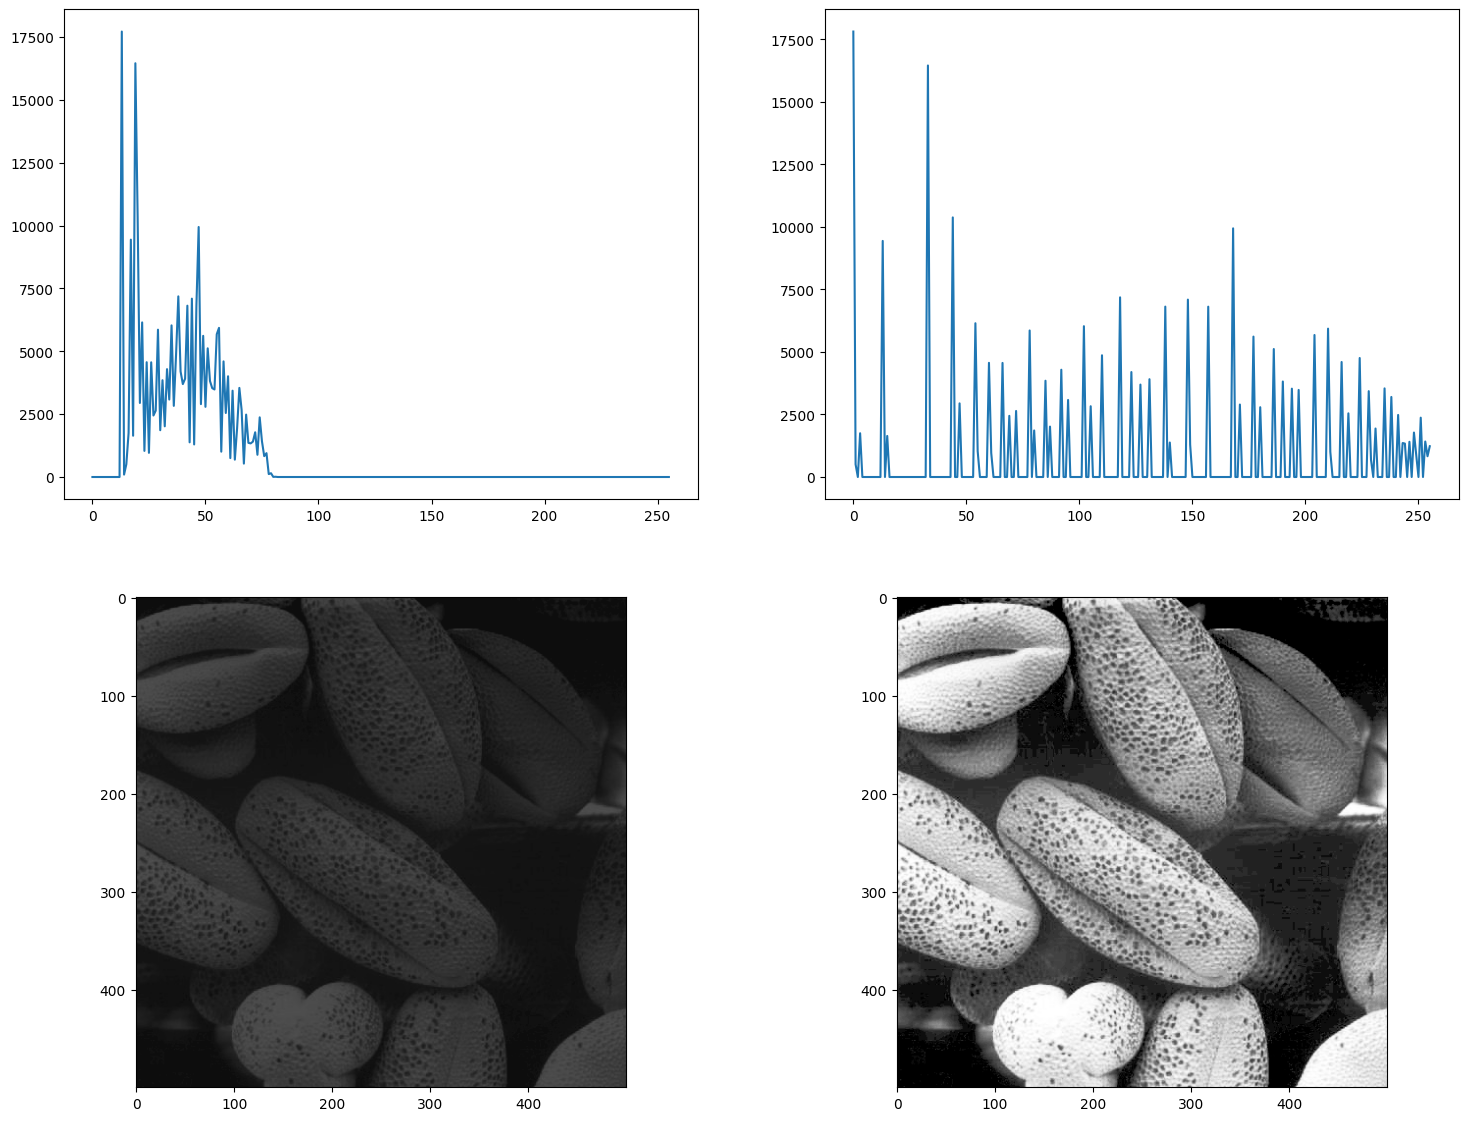

In [69]:
img=cv.imread("a1images/shells.tif",cv.IMREAD_GRAYSCALE)
hist = cv.calcHist([img],[0],None,[256],[0,256])
equalize= cv.equalizeHist(img)
equalize2=cv.cvtColor(equalize,cv.COLOR_BGR2RGB)
img2=cv.cvtColor(img,cv.COLOR_BGR2RGB)
equalize_hist = cv.calcHist([equalize],[0],None,[256],[0,256])
plt.figure(figsize=(18,14))
plt.subplot(2,2,1)
plt.plot(hist)
plt.subplot(2,2,2)
plt.plot(equalize_hist)
plt.subplot(2,2,3)
plt.imshow(img2)
plt.subplot(2,2,4)
plt.imshow(equalize2)
plt.show()